### Example of ____



In [1]:
library(readxl)
top50 <- read_excel("top_50_cities_by_homicide_2018.xlsx")

# the rankings were incorrect
top50$Rank = rank(top50$Rate)

# make them ascending
library(forcats)
top50$City <- fct_reorder(top50$City, top50$Rank, .desc = FALSE)

# units to millions
top50$Population <- top50$Population/1000000
table(top50$Country)


       Brazil      Colombia   El Salvador     Guatemala      Honduras 
           14             2             1             1             2 
      Jamaica        Mexico  South Africa United States     Venezuela 
            1            15             3             5             6 

In [2]:
# group several smaller countries into 1

top50$Country_2<- fct_collapse(top50$Country,
  Brazil = "Brazil",
  Mexico = "Mexico",
  United_States = "United States",
  Venezuela = "Venezuela",
  South_Africa = "South Africa",
  Other = c("Colombia", "El Salvador","Guatemala","Honduras","Jamaica")
)

table(top50$Country_2)


       Brazil         Other        Mexico  South_Africa United_States 
           14             7            15             3             5 
    Venezuela 
            6 

In [3]:
# order and label (factor variable)

top50$Country_2 <- factor(top50$Country_2,
                          levels = c("Mexico",
                                     "Brazil",
                                     "Venezuela",
                                     "Other",
                                     "United_States",
                                     "South_Africa"
                                     ), 
                          labels = c("Mexico",
                                     "Brazil",
                                     "Venezuela",
                                     "Other*",
                                     "United States",
                                     "South Africa"
                                     ))
table(top50$Country_2)


       Mexico        Brazil     Venezuela        Other* United States 
           15            14             6             7             5 
 South Africa 
            3 

In [4]:
# this shows that rows represent observations (and single cities).

library(data.table)
top50
length(top50)
length(top50$City)

Rank,City,Country,Region,Homicides,Population,Rate,Country_2
<dbl>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
50,Tijuana,Mexico,Latin America,2640,1.909424,138.26159,Mexico
49,Acapulco,Mexico,Latin America,948,0.857883,110.50458,Mexico
48,Caracas,Venezuela,Latin America,2980,2.980492,99.98349,Venezuela
47,Ciudad Victoria,Mexico,Latin America,314,0.365089,86.00643,Mexico
46,Ciudad Juárez,Mexico,Latin America,1251,1.462133,85.55993,Mexico
45,Irapuato,Mexico,Latin America,473,0.580808,81.43827,Mexico
44,Ciudad Guayana,Venezuela,Latin America,645,0.823722,78.30312,Venezuela
43,Natal,Brazil,Latin America,1185,1.587055,74.66660,Brazil
42,Fortaleza,Brazil,Latin America,2724,3.939460,69.14653,Brazil


[1] 8

[1] 50

In [5]:
# ggplot likes having long data, so arrange it long

library(tidyr)
top50_long <- gather(top50, key = "Variable", value = "Value", Homicides:Rate)

top50_long
length(top50_long)
length(top50_long$City)

Rank,City,Country,Region,Country_2,Variable,Value
<dbl>,<fct>,<chr>,<chr>,<fct>,<chr>,<dbl>
50,Tijuana,Mexico,Latin America,Mexico,Homicides,2640
49,Acapulco,Mexico,Latin America,Mexico,Homicides,948
48,Caracas,Venezuela,Latin America,Venezuela,Homicides,2980
47,Ciudad Victoria,Mexico,Latin America,Mexico,Homicides,314
46,Ciudad Juárez,Mexico,Latin America,Mexico,Homicides,1251
45,Irapuato,Mexico,Latin America,Mexico,Homicides,473
44,Ciudad Guayana,Venezuela,Latin America,Venezuela,Homicides,645
43,Natal,Brazil,Latin America,Brazil,Homicides,1185
42,Fortaleza,Brazil,Latin America,Brazil,Homicides,2724


[1] 7

[1] 150

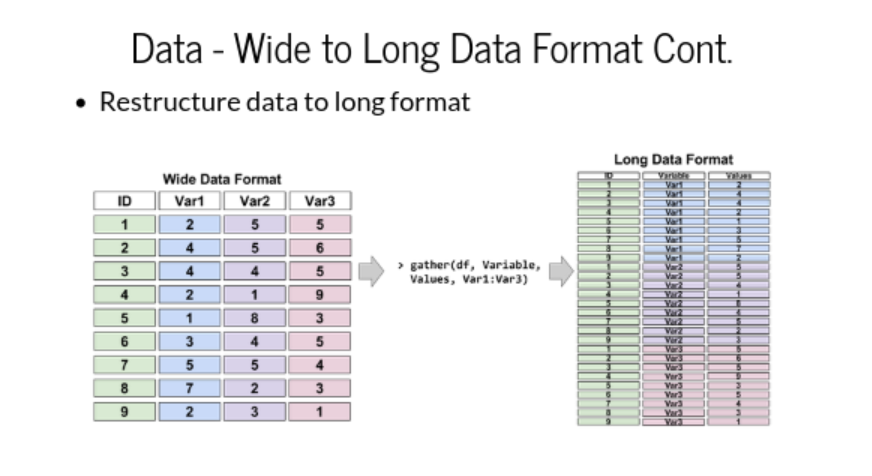

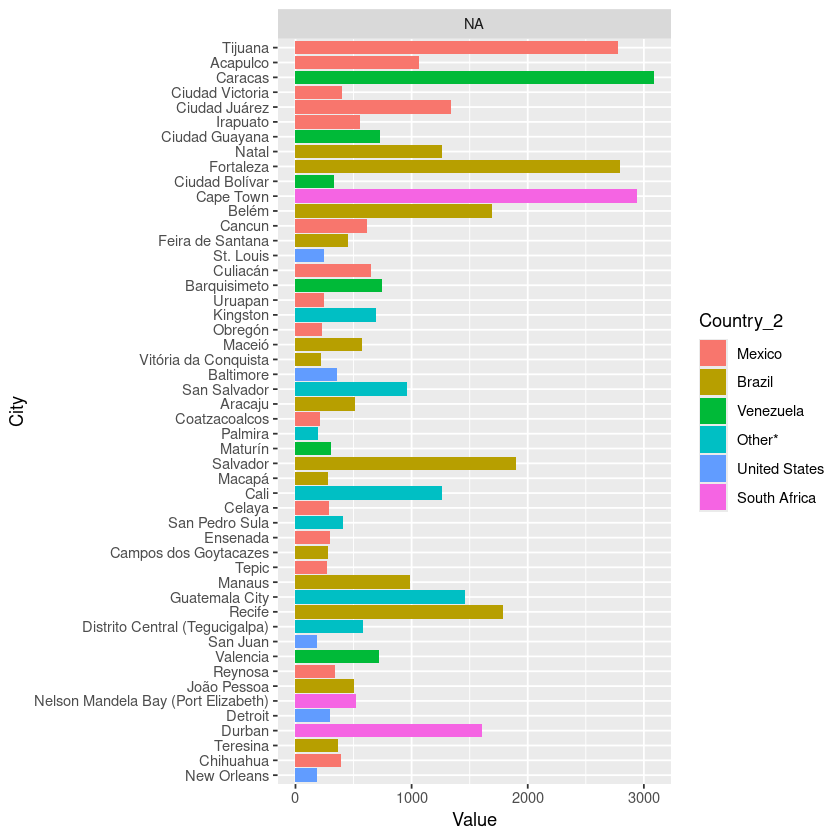

In [7]:
# add a rank variable

top50_long$Rank_labels <- c(rank(-top50$Homicides,ties.method = "min"),
                            rank(-top50$Population,,ties.method = "min"),
                            rank(-top50$Rate,ties.method = "min"))

# make factors presentable for visualisation

top50_long$Variable <- factor(top50_long$Variable,
                              levels = c("Rate","Homicides","Population"),
                              labels = c("Homicides per 100,000", 
                                         "Total Homicides",
                                         "Population Size (Millions)"))



library("ggplot2")

p <- ggplot(data = top50_long, 
            aes(x = City, y = Value, fill = Country_2)) +
  geom_bar(stat = "identity") + coord_flip() + 
  facet_grid(.~Variable, scales = "free")
p